# Load Packages

In [154]:
!pip install scipy==1.2.1
#!pip install tf-nightly
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.misc.pilutil import imread , imshow
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

%matplotlib inline
tf.__version__


You should consider upgrading via the '/Users/snehalnair/Workspace/blog/image_processing/imageenv/bin/python3 -m pip install --upgrade pip' command.


'2.3.0-dev20200610'

# Save Directory

In [3]:
imagedir = '/Users/snehalnair/Workspace/blog/image_processing/images/'
sample_imagedir = '/Users/snehalnair/Workspace/blog/image_processing/images_sample/'
cat_image_file = '/Users/snehalnair/Workspace/blog/image_processing/cat.jpg'
print(len(os.listdir(imagedir))) #List total files in the directory


25000


# Display Image

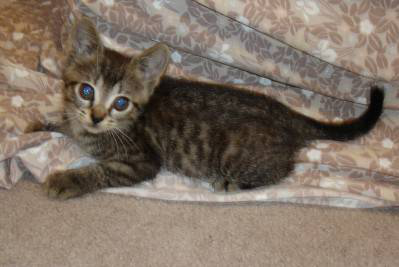

In [4]:
from PIL import Image
cat_image = Image.open(cat_image_file)
display(cat_image)

In [5]:
print(
    '\n\nMode of the image: ', cat_image.mode, 
    '\nSize of the image: ', cat_image.size,
    '\n\n'
    )



Mode of the image:  RGB 
Size of the image:  (399, 267) 




## Convert to grayscale

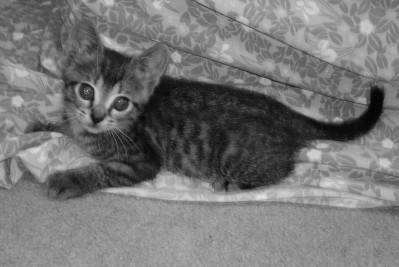

In [6]:

titles = ['Cat - RGB', 'Cat - Grayscale']
gsimage = cat_image.convert('L')
display(gsimage)

## Change size of the image

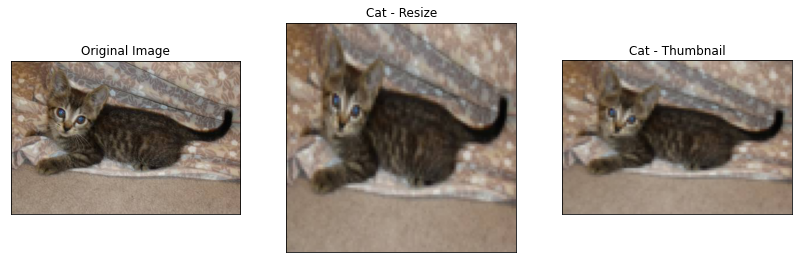

In [7]:
titles = ['Original Image', 'Cat - Resize', 'Cat - Thumbnail']
new_dim = (100,100)
thumb_image = cat_image.copy()
thumb_image.thumbnail(new_dim)
resize_image = cat_image.resize(new_dim)
images = [cat_image, resize_image, thumb_image]

fig, axes = plt.subplots(1, 3, figsize=(14,8))
objs = zip(axes,images, titles)

for ax, image_, title in objs:
    ax.imshow(image_, cmap=None)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())


In [8]:
# Extract the shape of the resized images
print(
    '\n\nShape of thumbnail image: ', np.asarray(thumb_image).shape, 
    '\nShape of resize image: ', np.asarray(resize_image).shape,
    '\n\n')



Shape of thumbnail image:  (67, 100, 3) 
Shape of resize image:  (100, 100, 3) 




## Plot image in different scales

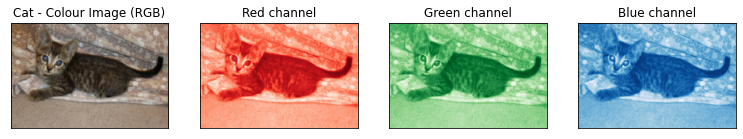

In [9]:

image = plt.imread(cat_image_file)

titles = ['Cat - Colour Image (RGB)', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

fig, axes = plt.subplots(1, 4, figsize=(13,12))
objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)

for ax, channel, title, cmap in objs:
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## Process Image with Keras

In [16]:
# Load image
image = tf.keras.preprocessing.image.load_img(cat_image_file)
# Convert to numpy array
input_arr = keras.preprocessing.image.img_to_array(image)
# Convert to keras input
input_arr_k = np.array([input_arr])

# tf.keras.preprocessing.image.img_to_array(image, data_format=None, dtype=None)



In [17]:
print(
    '\n\nShape of the image:\n', input_arr.shape, 
    '\nShape of the image processed with keras:\n', input_arr_k.shape,
    '\n\n')



Shape of the image:
 (267, 399, 3) 
Shape of the image processed with keras:
 (1, 267, 399, 3) 




## Move files to respective class folders

In [266]:
from pathlib import Path
import os

CLASSES = ['Dog', 'Cat']
src_path = '/Users/snehalnair/Workspace/blog/image_processing/images_sample/'
for class_ in CLASSES:
    Path( src_path + class_).mkdir(parents=True, exist_ok=True)
    for f in os.listdir(path):
        if os.path.isdir(f):
            continue
        elif Path(src_path+f).is_file():
            if f.split('.')[-1] == 'jpg' and f.split('.')[0].lower() == class_.lower():
                shutil.move(src_path+f, src_path+class_)

## Convert images into numpy array

In [300]:
def get_image_arrays(path, 
                     color_mode, 
                     dim, 
                     classes, 
                     label_classes):
    data = []
    labels =[]
    for class_,lab in zip(classes, label_classes):
        new_dim = (dim, dim)
        path = src_path+class_
        for f in os.listdir(path):
            if f.split('.')[-1] == 'jpg':
                img = Image.open(path+'/'+f)
                img_cs = img.convert(color_mode)
                img_resize = img_cs.resize(new_dim)
                img_array = np.asarray(img_resize)
                data.append(img_array)
                labels.append(lab)

    img_X = np.array(data)
    img_y = np.array(labels).reshape(len(labels),1)
    print('Shape of X:\n', img_X.shape, '\nShape of y:\n', img_y.shape)
    return img_X, img_y



CLASSES = ['DOG', 'CAT']
DIM = 100
LABEL_CLASS = [0,1]
COLOR_MODE = 'RGB'


img_X, img_y = get_image_arrays(
    path,
    COLOR_MODE,
    DIM,
    CLASSES,
    LABEL_CLASS
)

Shape of X:
 (20, 100, 100, 3) 
Shape of y:
 (20, 1)


In [268]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(img_X, img_y, test_size=0.20, random_state=42)

In [312]:
data_k = tf.keras.preprocessing.image_dataset_from_directory(
    sample_imagedir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(DIM, DIM),
    shuffle=True,
    seed=10,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
)

Found 20 files belonging to 2 classes.
Using 4 files for validation.


In [313]:
print(data_k)

<BatchDataset shapes: ((None, 100, 100, None), (None, 1)), types: (tf.float32, tf.float32)>
